In [21]:
import math
import numpy as np
import re
import random
import os

from collections import Counter
from matplotlib import pyplot as plt
from PIL import Image

In [22]:
os.listdir('train-letters/27')

['1_9.png',
 '1_12.png',
 '1_2.png',
 '1_11.png',
 '1_15.png',
 '1_0.png',
 '1_5.png',
 '1_13.png',
 '1_3.png',
 '1_1.png',
 '1_14.png',
 '1_4.png',
 '1_10.png',
 '1_7.png',
 '1_8.png',
 '1_6.png']

In [23]:
## Split each image into four segments of 120px width
# Labelling scheme: A-Z are 0-25 and 0-9 are 26-35
def labelFromChar(ch):
  if (ch >= 'A' and ch <= 'Z'):
    return ord(ch) - ord('A')
  else:
    return 26 + ord(ch) - ord('0')

def charFromLabel(label):
  if (label >= 0 and label <= 25):
    return chr(label + ord('A'))
  else:
    return chr(label - 26 + ord('0'))

# Overfit testing

In [24]:
# Overfit test
img_folder = 'train-letters'
letter_set = []
letter_train_set = []
letter_val_set = []
for i in range(36):
    all_i = []
    img_files = os.listdir(f'{img_folder}/{i}')
    letter = chr(ord('A') + i)
    j = 0
    for img_file in img_files:
        # print(img_file)
        img = np.array(Image.open(os.path.join(img_folder, str(i), img_file)))
        # pick 25% of images for the validation set
        all_i.append(img)
    # Pick 25% as validation
    val_indices = set(random.sample(range(len(all_i)), k=len(all_i)//4))
    for j in range(len(all_i)):
        letter_set.append((all_i[j], i))
        if j in val_indices:
            letter_val_set.append((all_i[j], i))
        else:
            letter_train_set.append((all_i[j], i))

    
print(f"Loaded {len(letter_set)} images from folder:\n{img_folder}")
print(f'{len(letter_train_set)} training, {len(letter_val_set)} validation')

Loaded 576 images from folder:
train-letters
432 training, 144 validation


In [25]:
all_dataset = letter_set
train_dataset = letter_train_set
val_dataset = letter_val_set
# Shuffle the dataset
np.random.shuffle(train_dataset)
np.random.shuffle(all_dataset)
X_dataset_all_orig = np.array([data[0] for data in all_dataset])
Y_dataset_all_orig = np.array([data[1] for data in all_dataset])
X_dataset_train_orig = np.array([data[0] for data in train_dataset])
Y_dataset_train_orig = np.array([data[1] for data in train_dataset])
X_dataset_val_orig = np.array([data[0] for data in val_dataset])
Y_dataset_val_orig = np.array([data[1] for data in val_dataset])
print(Y_dataset_train_orig)

[20 17  0  9  2  0 11 12  4 20 21 15 30  3 14  6 27 16 29  5 33 14 25  5
 25 12 23  8 15 22  5 23 31 18 24 30  9 11 22 11  0  4 25 24 23 31 15 35
  7 15  3 20 26 24 10 11 22 28  3 31  6 30 17 23 15 26 13  2 34 12  7 14
  4 29  2 20 24  5 27  0 31  1 20 13 26 29 34 30  9 34 17 22 10 32  1 33
 22  0 29 29  1 22 12  7 19  6 16 11  4 27 35  9 29 19  9 25 12 14 21  8
 30 18 26 17 26  6  3 19 32  8 35  3 16  7 33 31 35 28 25 20 24  6 18 26
 13 13  7 13 30 35 23 30 18 28 16  4 14  9  1 10 35 15 18 27 34 10  3 25
 24 16 20  0 12 22  0 21 17  1 34 29 23 23 14 35 15  6 29 33 21  6 10  7
  3 13 19  1 15  7 19 34 26 35 19 23 16 24 11  3 25 18  0  3 11 12 14 33
 27  5 20 22 28  5  8  7 15  5 34 28  2 17 35 21 10 14  3  4 24  4 25  9
 22  8 25  2 14 24  8 30 19 10 28 21 29 32 23 28  6 13 33  4 11 26 32  9
  6 14 31 26 27  8 30  9  0 31 31 13 23  7 10 11  5 18 27 22 27 10  2  0
  4 33 29  1 32 21  7  8 23 14 17 12 32 33  6 25 24 16 13 34 12 16  3 18
 18 20 21 20 31 15  8 31 21 11 10 32 22 12 28  6  2

In [26]:
type(Y_dataset_val_orig[0])

numpy.int64

In [27]:
NUMBER_OF_LABELS = 36
CONFIDENCE_THRESHOLD = 0.01

def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

# Normalize X (images) dataset (8 bit value 0..255 converted to float 0..1)
X_dataset_all = X_dataset_all_orig/255.
X_dataset_train = X_dataset_train_orig/255.
X_dataset_val = X_dataset_val_orig/255.

# Convert Y dataset to one-hot encoding
Y_dataset_all = convert_to_one_hot(Y_dataset_all_orig, NUMBER_OF_LABELS).T
Y_dataset_train = convert_to_one_hot(Y_dataset_train_orig, NUMBER_OF_LABELS).T
Y_dataset_val = convert_to_one_hot(Y_dataset_val_orig, NUMBER_OF_LABELS).T

print(Y_dataset_train[0]) # Check if matches the first label in Y_dataset_orig
print(Y_dataset_train[-1]) # Check if matches the last label in Y_dataset_orig

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


None of this is our true test dataset. Model performance needs to be tested on actual SIFTed images, but that will come later.

In [28]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend

In [29]:
def reset_weights(model):
  for ix, layer in enumerate(model.layers):
      if (hasattr(model.layers[ix], 'kernel_initializer') and
          hasattr(model.layers[ix], 'bias_initializer')):
          weight_initializer = model.layers[ix].kernel_initializer
          bias_initializer = model.layers[ix].bias_initializer

          old_weights, old_biases = model.layers[ix].get_weights()

          model.layers[ix].set_weights([
              weight_initializer(shape=old_weights.shape),
              bias_initializer(shape=len(old_biases))])

In [30]:
LETTER_DIM_Y = 80
LETTER_DIM_X = 64
X_dataset_val[0].shape

(80, 64)

In [31]:
conv_model = models.Sequential()
conv_model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                             input_shape=(LETTER_DIM_Y, LETTER_DIM_X, 1)))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
conv_model.add(layers.MaxPooling2D((2, 2)))
# Lines commented out to match the simpler lecture (Week 5) Keras code example
# conv_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# conv_model.add(layers.MaxPooling2D((2, 2)))
# conv_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Flatten())
conv_model.add(layers.Dropout(0.5))
conv_model.add(layers.Dense(64, activation='relu'))
conv_model.add(layers.Dense(NUMBER_OF_LABELS, activation='softmax'))
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 80, 64, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 40, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 40, 32, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 20, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 20480)             0         
                                                                 
 dropout_1 (Dropout)         (None, 20480)            

In [32]:
LEARNING_RATE = 1e-4
conv_model.compile(loss='categorical_crossentropy',
                   optimizer=optimizers.RMSprop(learning_rate=LEARNING_RATE),
                   metrics=['acc'])

In [35]:
reset_weights(conv_model)

In [36]:
history_conv = conv_model.fit(X_dataset_train, Y_dataset_train,
                              validation_data=(X_dataset_val, Y_dataset_val),
                              epochs=30,
                              batch_size=16)

# We can also run the training by specifiying the validation split directly.
#history_conv = conv_model.fit(X_dataset, Y_dataset,
#                              validation_split=VALIDATION_SPLIT,
#                              epochs=20,
#                              batch_size=16)

Epoch 1/30


27/27 [==============================] - 1s 32ms/step - loss: 3.5005 - acc: 0.1042 - val_loss: 3.3166 - val_acc: 0.2639
Epoch 2/30
27/27 [==============================] - 1s 37ms/step - loss: 3.1541 - acc: 0.2940 - val_loss: 2.8327 - val_acc: 0.5139
Epoch 3/30
27/27 [==============================] - 1s 29ms/step - loss: 2.6294 - acc: 0.4977 - val_loss: 2.2069 - val_acc: 0.6667
Epoch 4/30
27/27 [==============================] - 1s 29ms/step - loss: 1.9626 - acc: 0.6366 - val_loss: 1.4865 - val_acc: 0.8472
Epoch 5/30
27/27 [==============================] - 1s 31ms/step - loss: 1.3168 - acc: 0.7963 - val_loss: 0.8790 - val_acc: 0.9097
Epoch 6/30
27/27 [==============================] - 1s 31ms/step - loss: 0.7965 - acc: 0.8866 - val_loss: 0.5028 - val_acc: 0.9444
Epoch 7/30
27/27 [==============================] - 1s 30ms/step - loss: 0.4890 - acc: 0.9144 - val_loss: 0.2969 - val_acc: 0.9722
Epoch 8/30
27/27 [==============================] - 1s 26ms/step - loss: 0.2946 - acc: 0.9444 

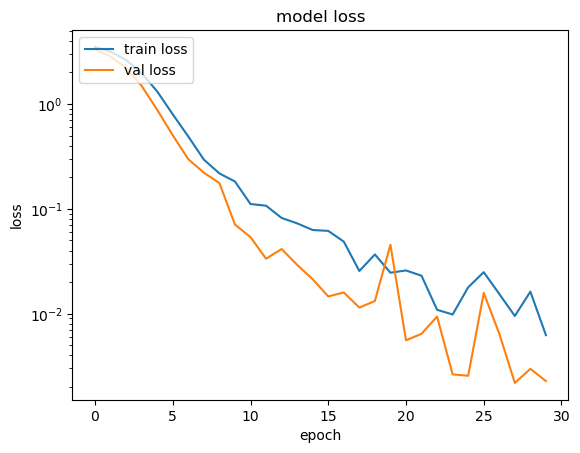

In [37]:
plt.semilogy(history_conv.history['loss'])
plt.semilogy(history_conv.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'val loss'], loc='upper left')
plt.show()

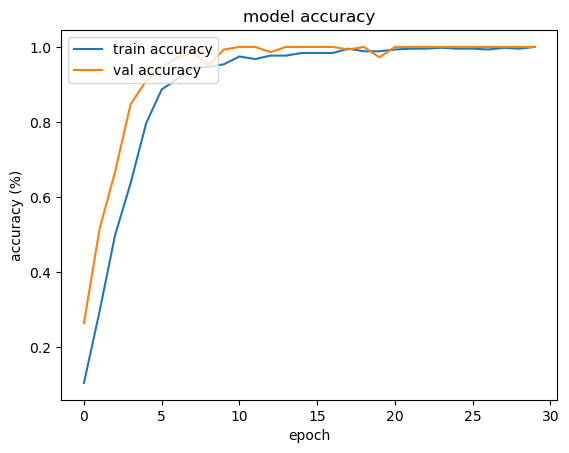

In [39]:
plt.plot(history_conv.history['acc'])
plt.plot(history_conv.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy (%)')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'val accuracy'], loc='upper left')
plt.show()

### Validation loss

In [40]:
import sklearn.metrics
labels = [chr(ascii) for ascii in range(ord('A'), ord('Z') + 1)]
print(labels)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [41]:
true_y = np.argmax(Y_dataset_val, axis=1)
pred_y_prob = conv_model.predict(X_dataset_val, verbose=2)
pred_y = np.argmax(pred_y_prob, axis=1)
true_y_orig = [charFromLabel(label) for label in true_y]
pred_y_orig = [charFromLabel(label) for label in pred_y]
print(true_y_orig)
print(pred_y_orig)

5/5 - 0s - 110ms/epoch - 22ms/step
['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D', 'E', 'E', 'E', 'E', 'F', 'F', 'F', 'F', 'G', 'G', 'G', 'G', 'H', 'H', 'H', 'H', 'I', 'I', 'I', 'I', 'J', 'J', 'J', 'J', 'K', 'K', 'K', 'K', 'L', 'L', 'L', 'L', 'M', 'M', 'M', 'M', 'N', 'N', 'N', 'N', 'O', 'O', 'O', 'O', 'P', 'P', 'P', 'P', 'Q', 'Q', 'Q', 'Q', 'R', 'R', 'R', 'R', 'S', 'S', 'S', 'S', 'T', 'T', 'T', 'T', 'U', 'U', 'U', 'U', 'V', 'V', 'V', 'V', 'W', 'W', 'W', 'W', 'X', 'X', 'X', 'X', 'Y', 'Y', 'Y', 'Y', 'Z', 'Z', 'Z', 'Z', '0', '0', '0', '0', '1', '1', '1', '1', '2', '2', '2', '2', '3', '3', '3', '3', '4', '4', '4', '4', '5', '5', '5', '5', '6', '6', '6', '6', '7', '7', '7', '7', '8', '8', '8', '8', '9', '9', '9', '9']
['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D', 'E', 'E', 'E', 'E', 'F', 'F', 'F', 'F', 'G', 'G', 'G', 'G', 'H', 'H', 'H', 'H', 'I', 'I', 'I', 'I', 'J', 'J', 'J', 'J', 'K', 'K', 'K', 'K', 'L', 'L', 'L', 'L', 'M'

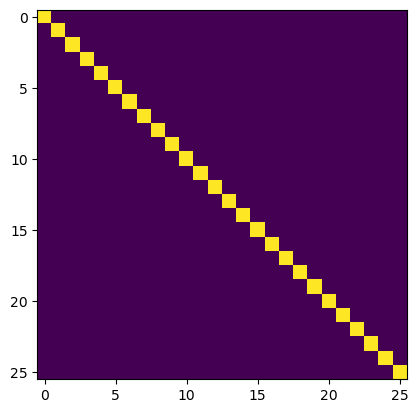

In [42]:
confusion_matrix = sklearn.metrics.confusion_matrix(true_y_orig, pred_y_orig, labels=labels)
plt.imshow(confusion_matrix)

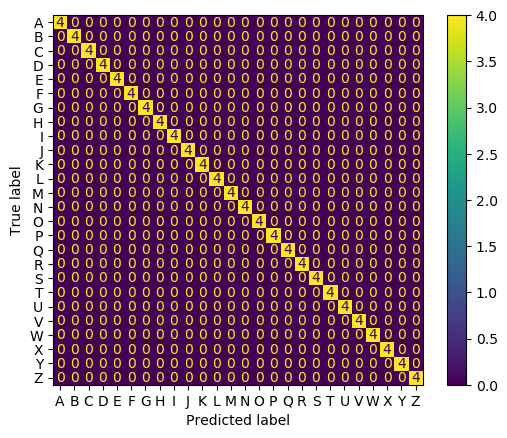

In [43]:
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=labels)
disp.plot()
plt.show()

18/18 - 0s - 200ms/epoch - 11ms/step


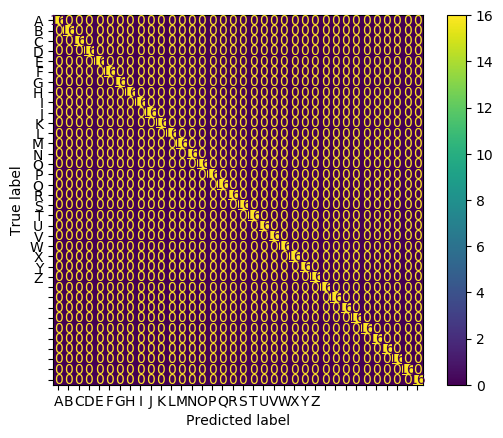

In [44]:
true_y = np.argmax(Y_dataset_all, axis=1)
pred_y_prob = conv_model.predict(X_dataset_all, verbose=2)
pred_y = np.argmax(pred_y_prob, axis=1)
confusion_matrix = sklearn.metrics.confusion_matrix(true_y, pred_y, labels=[i for i in range(NUMBER_OF_LABELS)])
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=labels)
disp.plot()
plt.show()

In [45]:
# Saving model parameters
conv_model.save('letter-recog-model.keras')  # The file needs to end with the .keras extension
conv_model.save('letter-recog-model.h5')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')


# Test loading model

In [41]:
# loaded_model = models.load_model('letter-recog-model.keras')
loaded_model = models.load_model('letter-recog-model.h5')
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 80, 64, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 40, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 40, 32, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 20, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 20480)             0         
                                                                 
 dropout_1 (Dropout)         (None, 20480)            

In [42]:
loaded_model.evaluate(X_dataset_all, Y_dataset_all)

13/13 [==============================] - 0s 12ms/step - loss: 7.7730e-05 - acc: 1.0000


[7.772999379085377e-05, 1.0]

# FULL DATA TRAINING

In [49]:
reset_weights(conv_model)
history_conv = conv_model.fit(X_dataset_all, Y_dataset_all,
                              epochs=25,
                              batch_size=16)

# We can also run the training by specifiying the validation split directly.
#history_conv = conv_model.fit(X_dataset, Y_dataset,
#                              validation_split=VALIDATION_SPLIT,
#                              epochs=20,
#                              batch_size=16)

Epoch 1/25
36/36 [==============================] - 1s 26ms/step - loss: 3.4485 - acc: 0.1250
Epoch 2/25
36/36 [==============================] - 1s 27ms/step - loss: 2.8739 - acc: 0.3785
Epoch 3/25
36/36 [==============================] - 1s 31ms/step - loss: 2.0320 - acc: 0.5868
Epoch 4/25
36/36 [==============================] - 1s 27ms/step - loss: 1.2377 - acc: 0.7656
Epoch 5/25
36/36 [==============================] - 1s 26ms/step - loss: 0.6633 - acc: 0.8819
Epoch 6/25
36/36 [==============================] - 1s 24ms/step - loss: 0.3596 - acc: 0.9358
Epoch 7/25
36/36 [==============================] - 1s 33ms/step - loss: 0.2106 - acc: 0.9618
Epoch 8/25
36/36 [==============================] - 1s 41ms/step - loss: 0.1374 - acc: 0.9688
Epoch 9/25
36/36 [==============================] - 1s 40ms/step - loss: 0.1224 - acc: 0.9740
Epoch 10/25
36/36 [==============================] - 1s 41ms/step - loss: 0.0826 - acc: 0.9826
Epoch 11/25
36/36 [==============================] - 1s 42m

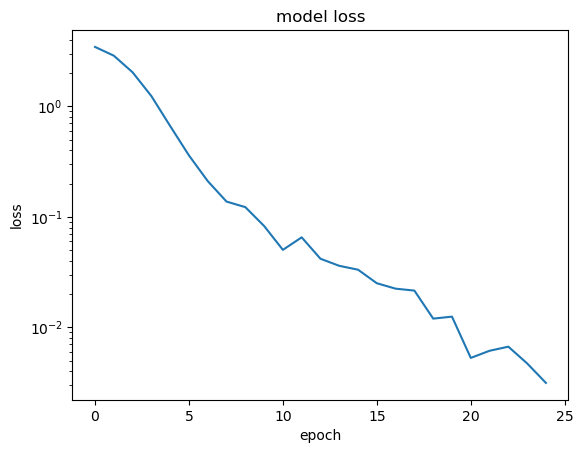

In [50]:
plt.semilogy(history_conv.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

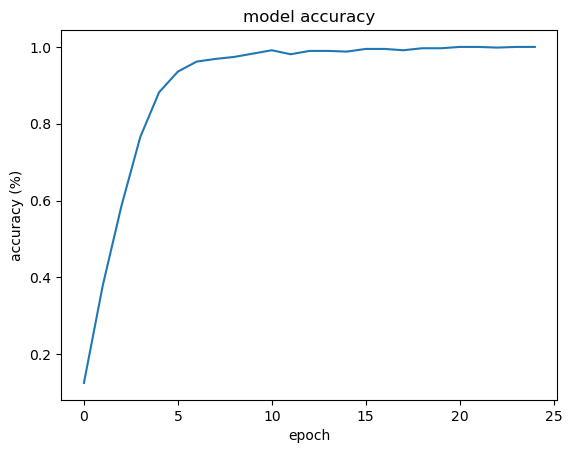

In [53]:
plt.plot(history_conv.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy (%)')
plt.xlabel('epoch')
plt.show()

In [54]:
# Saving model parameters
conv_model.save('letter-recog-model.keras')  # The file needs to end with the .keras extension
conv_model.save('letter-recog-model.h5')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')